# Making a prediction

## Introduction


See how your designs will actually fabricate. This example demonstrates PreFab's prediction model on a 500 nm target structure, showing corner rounding, feature erosion, and gap filling - the structural variations that affect device performance.

Import the library:

In [1]:
import prefab as pf

## Loading a device


Create a device to predict. The `Device` class represents photonic geometries in PreFab - load from GDS, images, or numpy arrays with binary pixel values (0 or 1). We'll use a target structure here, but explore other shapes in `shapes.py` or add your own.

<Axes: xlabel='x (nm)', ylabel='y (nm)'>

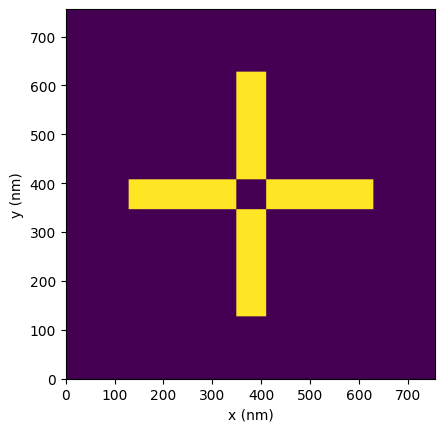

In [2]:
device = pf.shapes.target(width=500, arm_width=60)
device.plot(show_buffer=False)

## Predicting a device


Run a prediction using a specific fabrication model. [Reach out](mailto:hi@prefabphotonics.com) if you'd like a model trained for your fabrication process.

Predictions include fuzzy edges representing stochastic fabrication variations. The raw output shows the uncertainty range across different runs; binarization extracts the most probable outcome (50% threshold). You can binarize during or after prediction:

> **Note:** Initial prediction/correction may take longer due to server startup and model loading. Subsequent predictions should be quicker.


<Axes: xlabel='x (nm)', ylabel='y (nm)'>

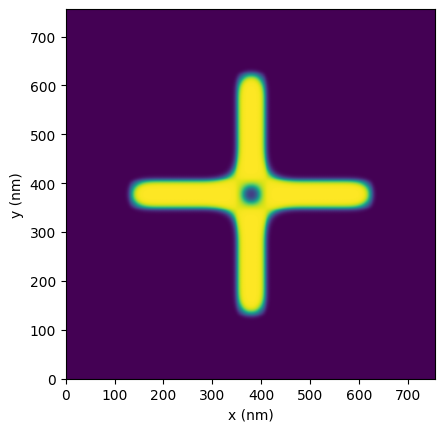

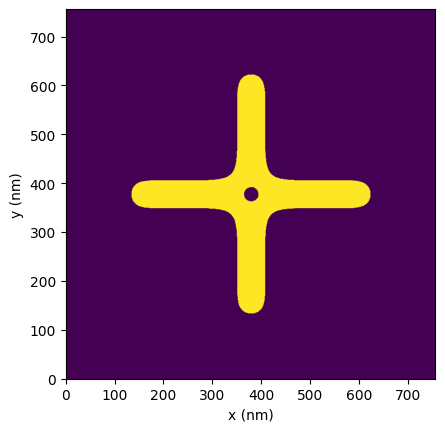

In [4]:
MODEL_NAME = "Generic_SOI"
prediction = device.predict(model=pf.models[MODEL_NAME])
prediction_bin = prediction.binarize()

prediction.plot(show_buffer=False)
prediction_bin.plot(show_buffer=False)

## Analyzing a prediction


Compare the predicted structure against your design. The 60 nm arms show erosion and corner rounding at convex corners. Concave corners in the center show dilation, and the center opening fills completely - typical fabrication effects that impact device performance.

<Axes: xlabel='x (nm)', ylabel='y (nm)'>

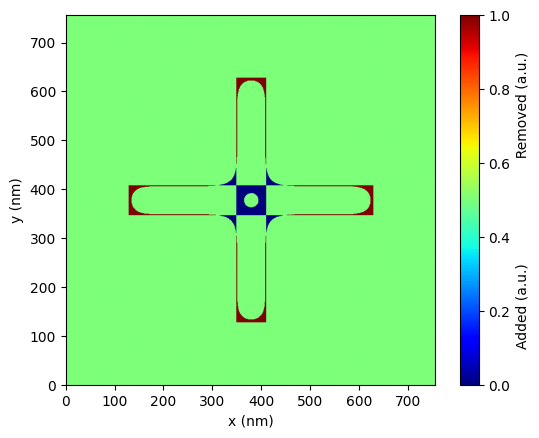

In [5]:
prediction_bin.plot_compare(ref_device=device, show_buffer=False)

Quantify the deviation using Intersection over Union (IoU). This metric measures geometric overlap: 1.0 is a perfect match, 0.0 is no overlap.

In [6]:
print(
    f"Prediction IoU: {pf.compare.intersection_over_union(device, prediction_bin):.2f}"
)

Prediction IoU: 0.83


83% overlap reflects the challenging 60 nm feature size. Try different `arm_width` values to see how feature size affects fabrication accuracy.

Visualize prediction uncertainty through the fuzzy edge regions. These areas show where stochastic fabrication variations cause device-to-device differences. While correction can't eliminate stochastic effects, understanding uncertainty helps identify high-variance features in your designs.

<Axes: xlabel='x (nm)', ylabel='y (nm)'>

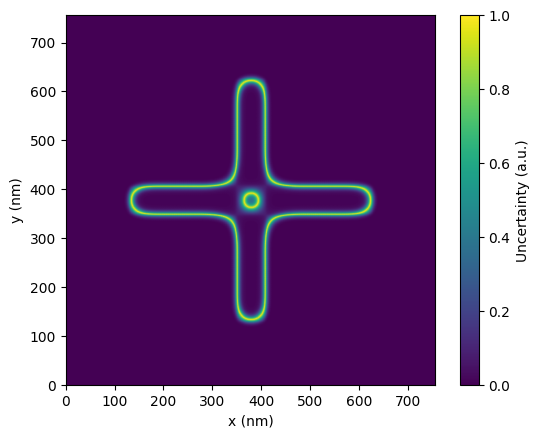

In [7]:
prediction.plot_uncertainty(show_buffer=False)

Next, see how to restore this structure using PreFab's correction capabilities.